In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import random

In [2]:
df = pd.read_csv('datasets/Clean_Pandemic_Taxi_Data.csv')

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,Bronx_PU,Brooklyn_PU,Manhattan_PU,Queens_PU,Staten_Island_PU,Bronx_DO,Brooklyn_DO,Manhattan_DO,Queens_DO,Staten_Island_DO
0,0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,...,0,0,1,0,0,0,0,1,0,0
1,1,2.0,2020-01-01 00:24:22,2020-01-01 00:25:54,1.0,0.56,1.0,N,238,239,...,0,0,1,0,0,0,0,1,0,0
2,2,2.0,2020-01-01 00:46:46,2020-01-01 00:49:17,1.0,0.62,1.0,N,238,239,...,0,0,1,0,0,0,0,1,0,0
3,3,1.0,2020-01-01 00:17:53,2020-01-01 00:22:47,1.0,0.80,1.0,Y,238,239,...,0,0,1,0,0,0,0,1,0,0
4,4,2.0,2020-01-01 00:49:45,2020-01-01 00:54:12,1.0,0.86,1.0,N,238,239,...,0,0,1,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248766 entries, 0 to 6248765
Data columns (total 35 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               float64
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           float64
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  zone_PU                object 
 20  LocationID_PU          int64  
 21  Borough_PU             object 
 22  zone_DO           

In [5]:
df =  df.drop(['Unnamed: 0', 'tpep_pickup_datetime',
             'tpep_dropoff_datetime', 'store_and_fwd_flag', 'zone_PU',
             'Borough_PU', 'zone_DO', 'Borough_DO'], axis=1)
df_scaled = scale(df)
y = df[['total_amount']]
X = df.drop(['total_amount'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_

array([[ 1.54227169e+00, -7.47855834e-03,  1.93583795e-03,
        -6.65133750e-02, -1.53586138e+09,  5.17304948e+08,
         2.91517628e-01,  1.00125957e+00,  6.90514896e-01,
        -1.54667428e+00,  1.03086352e+00,  1.00966474e+00,
         3.35085197e+00,  7.14245286e-01,  1.53586138e+09,
        -5.17304948e+08,  1.56296673e-01, -3.64495406e-01,
        -6.74234026e-01, -8.71488527e-01, -8.79087275e-01,
         1.79731389e+00,  1.74543964e+00,  1.76846814e+00,
         1.67075659e+00,  1.38727114e+00]])

In [7]:
print(linreg.score(X_test, y_test))
y_pred = linreg.predict(X_test)

0.9993530083988249


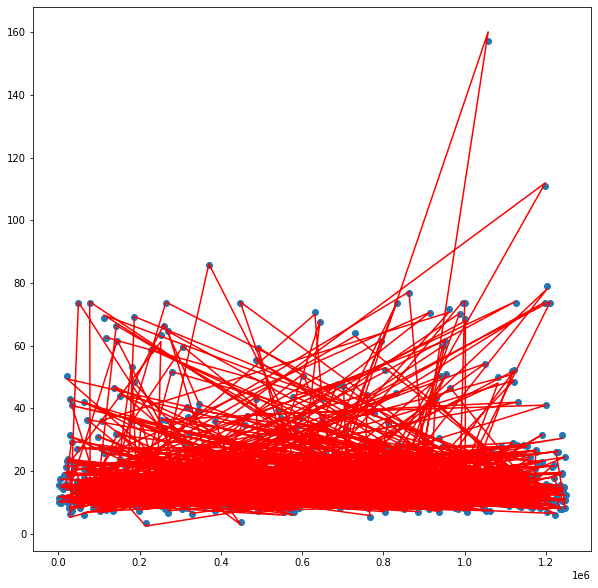

In [25]:
index = random.sample(range(0, len(y_pred)), 1000)
y_pred_sample = y_pred[index]
y_test_sample = y_test.iloc[index, 0]
plt.figure(figsize=(10, 10))
plt.scatter(index, y_test_sample)
plt.plot(index, y_pred_sample, c='red')

This shows an accuray of 99.93% which means that there should be a strong case of overefitting. This can cause a problem for new incoming data because it can begin to degrade the model's prediction ability. Overfitting means more bias and less variance which is not good in this case.

In [26]:
# I will attempt to use Ridge to try to regularize it and see how it goes
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train, y_train)
ridge.coef_

array([[ 1.98219719e-01,  6.70497692e-03,  8.62136347e-01,
         6.45839572e-01, -4.87438692e-04, -8.58211546e-04,
         6.97433236e-02,  4.02888040e-01,  2.28374765e-01,
        -1.31002392e+01,  9.96317458e-01,  1.11025368e+00,
         9.56173743e+00,  7.26086984e-01, -4.87438692e-04,
        -8.58211546e-04,  9.78490641e-01, -9.15915501e-01,
        -1.76246494e+00,  2.15496671e+00,  3.98994797e+00,
         1.95657827e+00,  1.15659478e+00, -1.48281702e+00,
         7.72018127e-01,  5.33797959e+00]])

In [67]:
# Normalizing the data helped to decrease the score which can help create more variance 
ridge.score(X_test, y_test)

0.9543723462726573

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


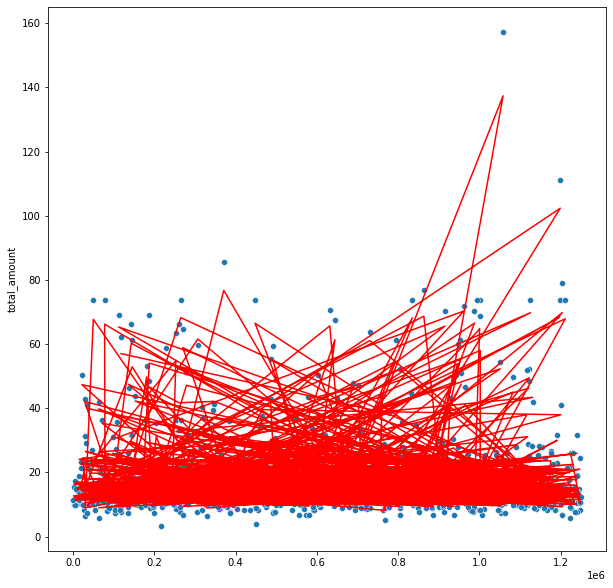

In [35]:
y_pred_sample = ridge.predict(X_test)[index]
plt.figure(figsize=(10, 10))
sns.scatterplot(index, y_test_sample)
plt.plot(index, y_pred_sample, c='red')